In [33]:
import osmnx as ox
import sklearn

import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt

GPS Data available here:

* [GeoLife Trajectories](https://www.microsoft.com/en-us/download/details.aspx?id=52367&from=https%3A%2F%2Fresearch.microsoft.com%2Fen-us%2Fdownloads%2Fb16d359d-d164-469e-9fd4-daa38f2b2e13%2Fdefault.aspx)
* [T-Drive Trajectories](https://www.microsoft.com/en-us/research/publication/t-drive-trajectory-data-sample/?from=https%3A%2F%2Fresearch.microsoft.com%2Fapps%2Fpubs%2F%3Fid%3D152883)

Here we use the GeoLife dataset.

We use the origin and destination of users to find clusters

In [9]:
# finding user with max number of trips

DATADIR = "/media/patrice/PROJECTS/Intact/geospatial_workshop/Geolife_trajectories/Data"

max_n_trips = 0
max_n_trips_user = ""

for user in os.listdir(DATADIR):
    n_trips_for_user = len(os.listdir(os.path.join(DATADIR, user, "Trajectory")))
        
    if n_trips_for_user > max_n_trips:
        max_n_trips = n_trips_for_user
        max_n_trips_user = user

print("User ID : %s ----- Number of trips : %d" % (max_n_trips_user, max_n_trips))

User ID : 128 ----- Number of trips : 2153


In [26]:
trajectories_dir = os.path.join(DATADIR, max_n_trips_user, "Trajectory")

origin_pts = []

for file in os.listdir(trajectories_dir):
    data = pd.read_csv(os.path.join(trajectories_dir, file), header=None, skiprows=6)
    origin_pts.append([data.iloc[0, 0], data.iloc[0, 1]]) # insert beginning
    origin_pts.append([data.iloc[-1, 0], data.iloc[-1, 1]]) # insert end


4306


In [30]:
origin_pts = np.array(origin_pts)

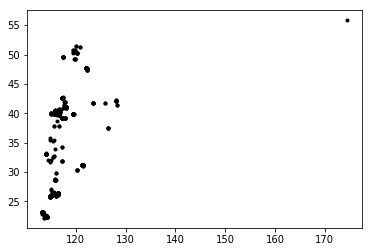

In [37]:

plt.plot(np.abs(origin_pts[:,1]), np.abs(origin_pts[:,0]), 'k.')

In [44]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.05)

model.fit(origin_pts)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

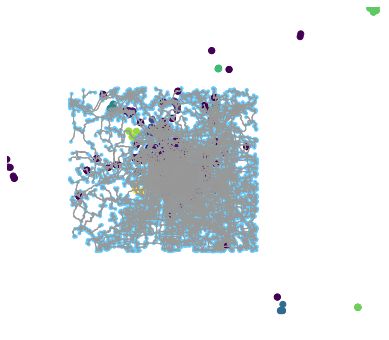

In [50]:
G = ox.graph_from_bbox(40.5, 39.5, 117.0, 115.5)
fig, ax = ox.plot_graph(G, show=False, close=False)

ax.scatter(np.abs(origin_pts[:,1]), np.abs(origin_pts[:,0]), c=model.labels_)
plt.axis([115, 118, 39, 41])
plt.show()